<a href="https://colab.research.google.com/github/chayakim/EFIMM0139/blob/main/Sainsbury's_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Sainsbury's"** sentiment analysis (from twitter)

---

# Load Data

In [ ]:
import pandas as pd
df = pd.read_json('sainsburys.json')

# Explore

Data Shape: (82821, 37)

Data Types:
 created_at                   datetime64[ns]
id                                    int64
id_str                                int64
text                                 object
display_text_range                   object
source                               object
truncated                              bool
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
in_reply_to_screen_name              object
user                                 object
geo                                  object
coordinates                          object
place                                object
contributors                        float64
is_quote_status                        bool
quote_count                           int64
reply_count                           int64
retweet_count                         int64
favorite_count                        

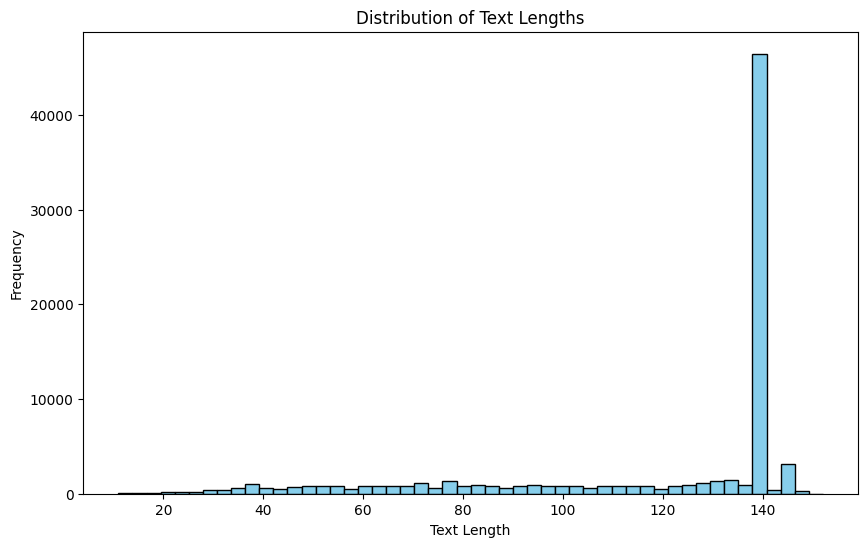

In [ ]:
import matplotlib.pyplot as plt

# Data Shape and Structure
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Identify text column
text_column = 'text'

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Text Data Characteristics
df['text_length'] = df[text_column].astype(str).apply(len)
average_text_length = df['text_length'].mean()
print(f"\nAverage Text Length: {average_text_length}")

# Distribution of text lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

In [ ]:
df = df.sort_values(by=['created_at'])
df = df.reset_index(drop=True)
df

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,extended_entities,scopes,text_length
0,2020-01-01 00:56:48,1212175807415816192,1212175807415816192,On 3rd bottle of @sainsburys asti with @Becca_...,None,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,None,NaN,NaN,None,None,None,None,None,NaN,117
1,2020-01-01 08:34:26,1212290975026077696,1212290975026077696,@vegancakery Maybe that's something we need to...,"[13, 120]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.212166e+18,1.212166e+18,5.966519e+08,...,None,NaN,NaN,None,None,None,None,None,NaN,120
2,2020-01-01 08:49:17,1212294711731531777,1212294711731531777,@FoodwiseWomen @waitrose @marksandspencer @sai...,"[62, 140]","<a href=""http://twitter.com/download/android"" ...",True,1.212292e+18,1.212292e+18,8.384122e+17,...,None,NaN,NaN,None,None,{'full_text': '@FoodwiseWomen @waitrose @marks...,None,None,NaN,140
3,2020-01-01 09:24:25,1212303554016358400,1212303554016358400,Big thanks to @asda and @Morrisons for still s...,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,...,None,NaN,NaN,None,None,{'full_text': 'Big thanks to @asda and @Morris...,None,None,NaN,140
4,2020-01-01 10:46:59,1212324331809902592,1212324331809902592,Mouse running across the floor in Romford @sai...,None,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,None,NaN,NaN,None,None,None,None,None,NaN,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82816,2020-12-30 23:43:26,1344428916430295042,1344428916430295040,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,None,None,None,None,None,NaN,140
82817,2020-12-30 23:48:52,1344430281453932544,1344430281453932544,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,None,None,None,None,None,NaN,140
82818,2020-12-30 23:49:14,1344430374982733826,1344430374982733824,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,None,None,None,None,None,NaN,140
82819,2020-12-30 23:52:49,1344431279069130753,1344431279069130752,@Morrisons @asda @LidlGB @AldiUK @Ocado @sains...,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",True,NaN,NaN,2.241689e+08,...,None,1.343951e+18,1.343951e+18,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,"{'url': 'https://t.co/fx6IbzefOL', 'expanded':...","{'full_text': ""@Morrisons @asda @LidlGB @AldiU...",0.0,None,NaN,140


In [ ]:
import pandas as pd

df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the quarter and year
df['quarter'] = df['created_at'].dt.quarter
df['year'] = df['created_at'].dt.year

# Filter for 2020 data
df_2020 = df[df['year'] == 2020]

# Group by quarter and count records
quarterly_records = df_2020.groupby('quarter')['created_at'].count()

# Print the results
print("Data Records for Each Quarter in 2020:")
print(quarterly_records)

Data Records for Each Quarter in 2020:
quarter
1    23207
2    14174
3    13068
4    32372
Name: created_at, dtype: int64


# Filter Date

In [ ]:
start_date = pd.to_datetime('2020-10-01')  # Convert to datetime
end_date = pd.to_datetime('2020-12-31')

# Filter the DataFrame
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)].reset_index(drop=True)

# Display the filtered DataFrame
df

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,extended_entities,scopes,text_length,quarter,year
0,2020-10-01 01:12:18,1311473986186944513,1311473986186944512,@CaraLisette @sainsburys This is concerning. W...,"[25, 140]","<a href=""http://twitter.com/download/android"" ...",True,1.311382e+18,1.311382e+18,2.257107e+09,...,NaN,None,None,{'full_text': '@CaraLisette @sainsburys This i...,None,None,NaN,140,4,2020
1,2020-10-01 02:06:58,1311487743105564674,1311487743105564672,@outdoorperscrip @emilylinka @sainsburys @Leic...,"[50, 139]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.311369e+18,1.311369e+18,8.888230e+17,...,NaN,None,None,None,None,None,NaN,139,4,2020
2,2020-10-01 02:08:30,1311488127488458752,1311488127488458752,@lifedrizzle @CaraLisette @sainsburys That’s s...,"[38, 53]","<a href=""http://twitter.com/download/iphone"" r...",False,1.311481e+18,1.311481e+18,4.604661e+09,...,NaN,None,None,None,None,None,NaN,53,4,2020
3,2020-10-01 03:07:34,1311502990579322880,1311502990579322880,RT @2BlossomBlue: @TMITV19 @sainsburys They ca...,None,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,NaN,None,None,None,0.0,"{'media': [{'id': 1311355104155643904, 'id_str...",NaN,84,4,2020
4,2020-10-01 03:53:18,1311514500072439811,1311514500072439808,RT @MSCintheUK: Huge congratulations to our la...,None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,NaN,None,None,None,None,None,NaN,140,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32367,2020-12-30 23:43:26,1344428916430295042,1344428916430295040,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,NaN,None,None,None,None,None,NaN,140,4,2020
32368,2020-12-30 23:48:52,1344430281453932544,1344430281453932544,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,NaN,None,None,None,None,None,NaN,140,4,2020
32369,2020-12-30 23:49:14,1344430374982733826,1344430374982733824,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,NaN,None,None,None,None,None,NaN,140,4,2020
32370,2020-12-30 23:52:49,1344431279069130753,1344431279069130752,@Morrisons @asda @LidlGB @AldiUK @Ocado @sains...,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",True,NaN,NaN,2.241689e+08,...,1.343951e+18,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,"{'url': 'https://t.co/fx6IbzefOL', 'expanded':...","{'full_text': ""@Morrisons @asda @LidlGB @AldiU...",0.0,None,NaN,140,4,2020


# Clean Data

In [ ]:
df = df.sort_values(by=['created_at'])
df = df.reset_index(drop=True)
# Keep only the specified columns
df = df[['created_at', 'text', 'extended_tweet']]
df

,created_at,text,extended_tweet
0,2020-10-01 01:12:18,@CaraLisette @sainsburys This is concerning. W...,{'full_text': '@CaraLisette @sainsburys This i...
1,2020-10-01 02:06:58,@outdoorperscrip @emilylinka @sainsburys @Leic...,None
2,2020-10-01 02:08:30,@lifedrizzle @CaraLisette @sainsburys That’s s...,None
3,2020-10-01 03:07:34,RT @2BlossomBlue: @TMITV19 @sainsburys They ca...,None
4,2020-10-01 03:53:18,RT @MSCintheUK: Huge congratulations to our la...,None
...,...,...,...
32367,2020-12-30 23:43:26,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None
32368,2020-12-30 23:48:52,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None
32369,2020-12-30 23:49:14,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None
32370,2020-12-30 23:52:49,@Morrisons @asda @LidlGB @AldiUK @Ocado @sains...,"{'full_text': ""@Morrisons @asda @LidlGB @AldiU..."


In [ ]:
duplicates = df[df.duplicated(subset=['text'])]
print(duplicates)

               created_at                                               text  \
20    2020-10-01 09:20:42  RT @sainsburys: We are Celebrating Black Histo...   
45    2020-10-01 13:53:47  RT @TMITV19: So apparently @sainsburys are now...   
49    2020-10-01 14:26:32  RT @TMITV19: So apparently @sainsburys are now...   
53    2020-10-01 14:54:43            RT @sainsburys: https://t.co/P7nCbukUv7   
62    2020-10-01 16:46:47  RT @CaraLisette: Yet again we are seeing behav...   
...                   ...                                                ...   
32365 2020-12-30 23:10:45  RT @poorscousertom1: Dear @Ocado @waitrose @sa...   
32366 2020-12-30 23:17:14  RT @poorscousertom1: Dear @Ocado @waitrose @sa...   
32367 2020-12-30 23:43:26  RT @poorscousertom1: Dear @Ocado @waitrose @sa...   
32368 2020-12-30 23:48:52  RT @poorscousertom1: Dear @Ocado @waitrose @sa...   
32369 2020-12-30 23:49:14  RT @poorscousertom1: Dear @Ocado @waitrose @sa...   

      extended_tweet  
20              

In [ ]:
# Remove duplicates
df = df.drop_duplicates(subset=['text'], keep='first')

# Display the dataframe
df

,created_at,text,extended_tweet
0,2020-10-01 01:12:18,@CaraLisette @sainsburys This is concerning. W...,{'full_text': '@CaraLisette @sainsburys This i...
1,2020-10-01 02:06:58,@outdoorperscrip @emilylinka @sainsburys @Leic...,None
2,2020-10-01 02:08:30,@lifedrizzle @CaraLisette @sainsburys That’s s...,None
3,2020-10-01 03:07:34,RT @2BlossomBlue: @TMITV19 @sainsburys They ca...,None
4,2020-10-01 03:53:18,RT @MSCintheUK: Huge congratulations to our la...,None
...,...,...,...
32357,2020-12-30 22:58:27,@poorscousertom1 @Ocado @waitrose @sainsburys ...,{'full_text': '@poorscousertom1 @Ocado @waitro...
32362,2020-12-30 23:05:39,If you arengoing to @sainsburys &amp; insist t...,{'full_text': 'If you arengoing to @sainsburys...
32364,2020-12-30 23:08:54,@Ocado @poorscousertom1 @waitrose @sainsburys ...,{'full_text': '@Ocado @poorscousertom1 @waitro...
32370,2020-12-30 23:52:49,@Morrisons @asda @LidlGB @AldiUK @Ocado @sains...,"{'full_text': ""@Morrisons @asda @LidlGB @AldiU..."


In [ ]:
# Check for remaining duplicates
duplicate_counts = df['text'].duplicated().sum()
print(f"Number of remaining duplicates in 'text': {duplicate_counts}")

Number of remaining duplicates in 'text': 0


## Extract **extended_tweet**

In [ ]:
print(df.extended_tweet.head())

0    {'full_text': '@CaraLisette @sainsburys This i...
1                                                 None
2                                                 None
3                                                 None
4                                                 None
Name: extended_tweet, dtype: object


In [ ]:
print(df['extended_tweet'].iloc[0])  # Check the first row
print(type(df['extended_tweet'].iloc[0]))  # Check the type


{'full_text': '@CaraLisette @sainsburys This is concerning. Why is it so hard to produce sensible non-triggering evidence based advice for those people who have been advised to lose weight for their health? This seems like a real research priority.', 'display_text_range': [25, 233], 'entities': {'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'CaraLisette', 'name': 'Cara Lisette', 'id': 2257107310, 'id_str': '2257107310', 'indices': [0, 12]}, {'screen_name': 'sainsburys', 'name': "Sainsbury's", 'id': 80685646, 'id_str': '80685646', 'indices': [13, 24]}], 'symbols': []}}
<class 'str'>


convert **string** to **dictionary**

In [ ]:
import ast
df['extended_tweet'] = df['extended_tweet'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else x)

<ipython-input-13-cf67f76e3965>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extended_tweet'] = df['extended_tweet'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else x)


In [ ]:
# Check which values in extended_tweet are of dict type
df['is_dict'] = df['extended_tweet'].apply(lambda x: isinstance(x, dict))

# Display rows where extended_tweet is a dictionary
df[df['is_dict']]

<ipython-input-14-3f94bcbc355e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_dict'] = df['extended_tweet'].apply(lambda x: isinstance(x, dict))


,created_at,text,extended_tweet,is_dict
0,2020-10-01 01:12:18,@CaraLisette @sainsburys This is concerning. W...,{'full_text': '@CaraLisette @sainsburys This i...,True
7,2020-10-01 07:50:41,@Argos_Online @sainsburys why at 8pm last nigh...,{'full_text': '@Argos_Online @sainsburys why a...,True
8,2020-10-01 07:58:54,@PlenishDrinks @sainsburys Exactly 👍👍👍\nBut pl...,{'full_text': '@PlenishDrinks @sainsburys Exac...,True
9,2020-10-01 07:59:00,@sainsburys But I was told in the 16/08/20 tha...,{'full_text': '@sainsburys But I was told in t...,True
11,2020-10-01 08:07:23,We are so excited to publish the paperback of ...,{'full_text': 'We are so excited to publish th...,True
...,...,...,...,...
32347,2020-12-30 22:14:22,@marciabigg @EndUKLockdown1 @dalekpete @dpears...,{'full_text': '@marciabigg @EndUKLockdown1 @da...,True
32357,2020-12-30 22:58:27,@poorscousertom1 @Ocado @waitrose @sainsburys ...,{'full_text': '@poorscousertom1 @Ocado @waitro...,True
32362,2020-12-30 23:05:39,If you arengoing to @sainsburys &amp; insist t...,{'full_text': 'If you arengoing to @sainsburys...,True
32364,2020-12-30 23:08:54,@Ocado @poorscousertom1 @waitrose @sainsburys ...,{'full_text': '@Ocado @poorscousertom1 @waitro...,True


In [ ]:
# combine Tweet text
df['full_text'] = [x.get('full_text', None) if isinstance(x, dict) else None for x in df['extended_tweet']]

df['full_text'] = [y if x==None else x for x,y in zip(df['full_text'],df['text'])]

<ipython-input-15-b6ffebcae6ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = [x.get('full_text', None) if isinstance(x, dict) else None for x in df['extended_tweet']]
<ipython-input-15-b6ffebcae6ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = [y if x==None else x for x,y in zip(df['full_text'],df['text'])]


In [ ]:
print(df['extended_tweet'].apply(lambda x: x['full_text'] if isinstance(x, dict) and 'full_text' in x else None))

0        @CaraLisette @sainsburys This is concerning. W...
1                                                     None
2                                                     None
3                                                     None
4                                                     None
                               ...                        
32357    @poorscousertom1 @Ocado @waitrose @sainsburys ...
32362    If you arengoing to @sainsburys &amp; insist t...
32364    @Ocado @poorscousertom1 @waitrose @sainsburys ...
32370    @Morrisons @asda @LidlGB @AldiUK @Ocado @sains...
32371                                                 None
Name: extended_tweet, Length: 24144, dtype: object


In [ ]:
df

,created_at,text,extended_tweet,is_dict,full_text
0,2020-10-01 01:12:18,@CaraLisette @sainsburys This is concerning. W...,{'full_text': '@CaraLisette @sainsburys This i...,True,@CaraLisette @sainsburys This is concerning. W...
1,2020-10-01 02:06:58,@outdoorperscrip @emilylinka @sainsburys @Leic...,None,False,@outdoorperscrip @emilylinka @sainsburys @Leic...
2,2020-10-01 02:08:30,@lifedrizzle @CaraLisette @sainsburys That’s s...,None,False,@lifedrizzle @CaraLisette @sainsburys That’s s...
3,2020-10-01 03:07:34,RT @2BlossomBlue: @TMITV19 @sainsburys They ca...,None,False,RT @2BlossomBlue: @TMITV19 @sainsburys They ca...
4,2020-10-01 03:53:18,RT @MSCintheUK: Huge congratulations to our la...,None,False,RT @MSCintheUK: Huge congratulations to our la...
...,...,...,...,...,...
32357,2020-12-30 22:58:27,@poorscousertom1 @Ocado @waitrose @sainsburys ...,{'full_text': '@poorscousertom1 @Ocado @waitro...,True,@poorscousertom1 @Ocado @waitrose @sainsburys ...
32362,2020-12-30 23:05:39,If you arengoing to @sainsburys &amp; insist t...,{'full_text': 'If you arengoing to @sainsburys...,True,If you arengoing to @sainsburys &amp; insist t...
32364,2020-12-30 23:08:54,@Ocado @poorscousertom1 @waitrose @sainsburys ...,{'full_text': '@Ocado @poorscousertom1 @waitro...,True,@Ocado @poorscousertom1 @waitrose @sainsburys ...
32370,2020-12-30 23:52:49,@Morrisons @asda @LidlGB @AldiUK @Ocado @sains...,{'full_text': '@Morrisons @asda @LidlGB @AldiU...,True,@Morrisons @asda @LidlGB @AldiUK @Ocado @sains...


# Text Processing


In [ ]:
!pip install contractions
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import html
import contractions
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.8 MB/s eta 0:00:00


In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a list of brand names to remove
brand_names_to_remove = [
    '@tesco', 'tesco', '@morrisons', 'morrisons', '@asda', 'asda',
    '@aldiuk', 'aldi', '@lidlgb', 'lidl', '@waitrose', 'waitrose','marksandspencer','aldiuk', 'lidlgb',
    'icelandfoods','argosonline','amazonfresh','sainsbury','sainsbury’s','sainsburys','ocado'
]


# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Data Cleaning
def clean_text(text):
    # Expand contractions
    text = expand_contractions(text)
    # Decode HTML entities
    text = html.unescape(text)
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove retweet indicator "RT"
    text = re.sub(r'\b(rt)\b', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove all @mentions
    text = re.sub(r'@\w+', '', text)
    # Remove all hashtags
    text = re.sub(r'#\S+', '', text)
    # Tokenize, remove stopwords & brand names
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words and word not in brand_names_to_remove])
     # Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in word_tokenize(text)])
    return text

# Apply text cleaning
df['cleaned_text'] = df['full_text'].astype(str).apply(clean_text)

# Display the first few rows of the updated DataFrame
display(df[['full_text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-19-3240db68cadd>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['full_text'].astype(str).apply(clean_text)


,full_text,cleaned_text
0,@CaraLisette @sainsburys This is concerning. W...,caralisette sainsburys concern hard produce se...
1,@outdoorperscrip @emilylinka @sainsburys @Leic...,outdoorperscrip emilylinka sainsburys leicnut ...
2,@lifedrizzle @CaraLisette @sainsburys That’s s...,lifedrizzle caralisette sainsburys shock
3,RT @2BlossomBlue: @TMITV19 @sainsburys They ca...,blossomblue tmitv sainsburys ask
4,RT @MSCintheUK: Huge congratulations to our la...,mscintheuk huge congratulations last set mscaw...


In [ ]:
# Save to an Excel file
df.to_excel('Manual label_Update.xlsx', index=False)

## **Manual labelling each records** (from personal perspective)
### show in file name "Manual_labelling_data.xlsx"

In [ ]:
import pandas as pd

labelling_df = pd.read_excel('Manual_labelling_data.xlsx')

In [ ]:
labelling_df = labelling_df = labelling_df.head(2414)
labelling_df

,created_at,cleaned_text,sentiment
0,2020-10-01 01:12:18,caralisette sainsburys concern hard produce se...,Negative
1,2020-10-01 02:06:58,outdoorperscrip emilylinka sainsburys leicnut ...,Neutral
2,2020-10-01 02:08:30,lifedrizzle caralisette sainsburys shock,Neutral
3,2020-10-01 03:07:34,blossomblue tmitv sainsburys ask,Neutral
4,2020-10-01 03:53:18,mscintheuk huge congratulations last set mscaw...,Positive
...,...,...,...
2409,2020-10-03 17:35:37,suemoffet sainsburys find offensive sainsburys...,Positive
2410,2020-10-03 17:35:44,fredstr_ ukfreemind sainsburys like ya ratio g,Neutral
2411,2020-10-03 17:38:37,fudgeyman tazerofficial sainsburys,Neutral
2412,2020-10-03 17:38:50,dunnedoreen sainsburys good know gammonbegone,Positive


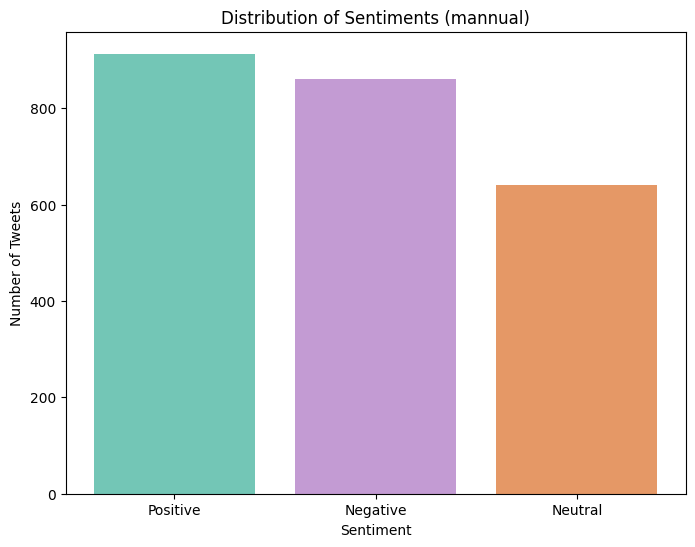

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the sentiment distribution
sentiment_counts = labelling_df['sentiment'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#73C6B6', '#C39BD3', '#E59866'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Sentiments (mannual)")
plt.xticks(sentiment_counts.index, labels=['Positive', 'Negative', 'Neutral'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = labelling_df['cleaned_text']
y = labelling_df['sentiment']

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), max_df=0.8, min_df=5)
X = vectorizer.fit_transform(X)

# Separating the 70% data for training data and 30% for testing data
trainsize = 0.7
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-trainsize,
                                         random_state=123)

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Apply SMOTE-Tomek to balance the dataset
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Print class distribution after resampling
print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({'Negative': 617, 'Positive': 603, 'Neutral': 592})


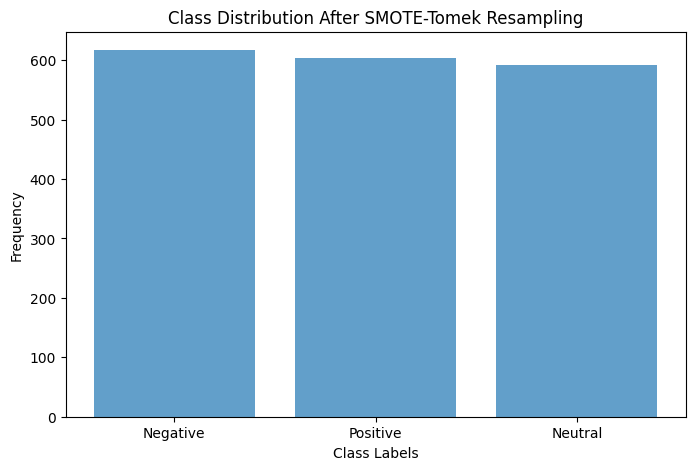

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get class distribution after resampling
class_counts = Counter(y_resampled)

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution After SMOTE-Tomek Resampling")
plt.xticks(np.arange(len(class_counts)), labels=class_counts.keys())

# Show plot
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the classifiers
nb_model = MultinomialNB()

# Train the models
nb_model.fit(X_resampled, y_resampled)


MultinomialNB()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

Naive Bayes Metrics:
  Accuracy: 0.5959
  Precision: 0.6106
  Recall: 0.5959
  F1-score: 0.5977


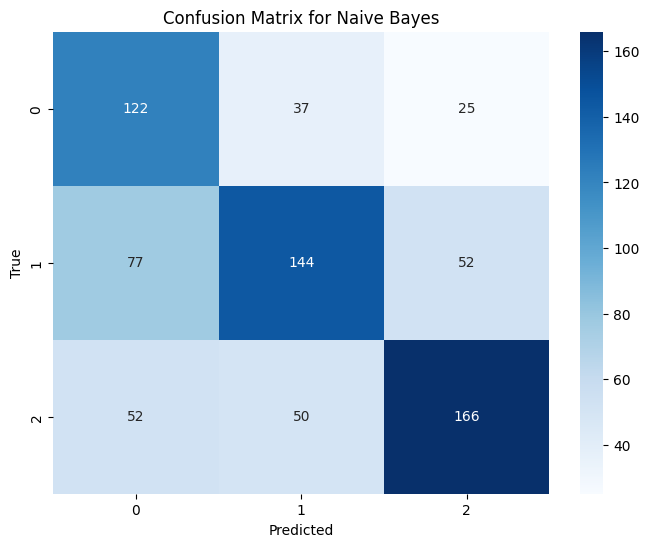


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.49      0.66      0.56       184
     Neutral       0.62      0.53      0.57       273
    Positive       0.68      0.62      0.65       268

    accuracy                           0.60       725
   macro avg       0.60      0.60      0.59       725
weighted avg       0.61      0.60      0.60       725

Logistic Regression Metrics:
  Accuracy: 0.6772
  Precision: 0.6815
  Recall: 0.6772
  F1-score: 0.6766


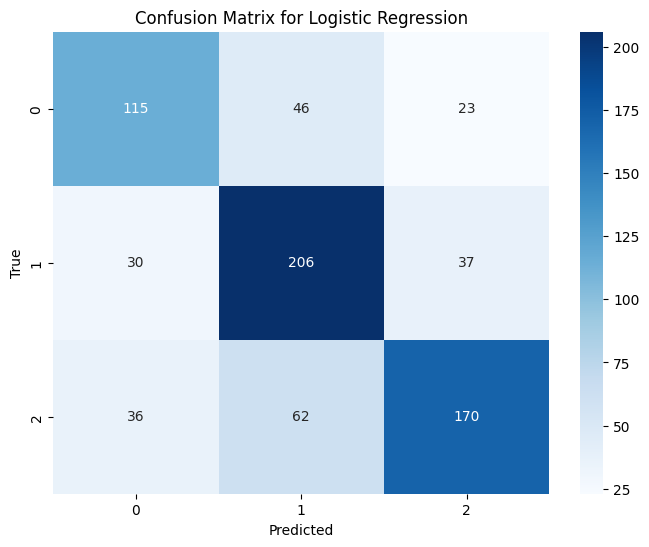


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.64      0.62      0.63       184
     Neutral       0.66      0.75      0.70       273
    Positive       0.74      0.63      0.68       268

    accuracy                           0.68       725
   macro avg       0.68      0.67      0.67       725
weighted avg       0.68      0.68      0.68       725



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict sentiments on the test data
nb_predictions = nb_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate the models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print(f"\n{model_name} Classification Report:\n{classification_report(y_true, y_pred)}")

evaluate_model("Naive Bayes", y_test, nb_predictions)
evaluate_model("Logistic Regression", y_test, lr_predictions)

# **Pre Trained** model

In [ ]:
import pandas as pd

df = pd.read_excel('Manual_labelling_data.xlsx')

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'#\S+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Clean the cleaned_text column (recheck the text processing again)
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

# Encode the sentiment labels (assuming 'Negative', 'Neutral', 'Positive')
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

# Handle missing values (remove rows with missing cleaned_text or sentiment)
df.dropna(subset=['cleaned_text', 'sentiment'], inplace=True)

# Validate the data
print(df[['cleaned_text', 'sentiment']].head(10))
print(df.info())

                                        cleaned_text  sentiment
0  caralisette sainsburys concern hard produce se...        0.0
1  outdoorperscrip emilylinka sainsburys leicnut ...        1.0
2           lifedrizzle caralisette sainsburys shock        1.0
3                   blossomblue tmitv sainsburys ask        1.0
4  mscintheuk huge congratulations last set mscaw...        2.0
5                      sainsburys yes keep get reply        0.0
6  adamfare sainsburys beat dietitians_mhg wonder...        1.0
7  argos_online sainsburys pm last night none sta...        0.0
8  plenishdrinks sainsburys exactly please contac...        2.0
9  sainsburys tell someone would get back go news...        1.0
<class 'pandas.core.frame.DataFrame'>
Index: 2414 entries, 0 to 2413
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    2414 non-null   datetime64[ns]
 1   cleaned_text  2414 non-null   object    

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'],
    df['sentiment'],
    test_size=0.3,
    stratify=df['sentiment'],
    random_state=42
)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1689,)
X_test shape: (725,)
y_train shape: (1689,)
y_test shape: (725,)


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Define model names
model_names = {
    "cardiffnlp/twitter-roberta-base-sentiment-latest": "twitter_roberta",
    "distilbert-base-uncased-finetuned-sst-2-english": "distilbert",
    "roberta-base": "roberta"
}

# Define the number of labels
num_labels = 3

# Initialize a dictionary to store the trained models
trained_models = {}

# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

for model_name, save_name in model_names.items():
    # Load pre-trained model and tokenizer
    if model_name == "distilbert-base-uncased-finetuned-sst-2-english":
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)
    else:
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Tokenize the text data
    train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
    test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

    # Create datasets with correct format
    class SentimentDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx]) # Use labels[idx]
            return item

        def __len__(self):
            return len(self.labels)

    train_dataset = SentimentDataset(train_encodings, y_train.values)
    eval_dataset = SentimentDataset(test_encodings, y_test.values)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f"./{save_name}_model",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy"
    )

    def compute_metrics(eval_pred):
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)
        precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
        acc = accuracy_score(labels, predictions)
        return {
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

    # Create Trainer instance
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Save the model
    model.save_pretrained(f"./{save_name}_trained.bin")
    trained_models[save_name] = model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tm24184 (tm24184-university-of-bristol) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.661795,0.757241,0.769859,0.757241,0.758985
2,No log,0.631181,0.802759,0.802924,0.802759,0.802834
3,No log,0.683884,0.795862,0.799754,0.795862,0.796974


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.615911,0.777931,0.782896,0.777931,0.775993
2,No log,0.599502,0.794483,0.794614,0.794483,0.794466
3,No log,0.627253,0.791724,0.794814,0.791724,0.792372


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.975685,0.522759,0.392666,0.522759,0.445633
2,No log,0.866126,0.605517,0.461953,0.605517,0.518593
3,No log,0.897791,0.659310,0.679535,0.659310,0.658091


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating model: twitter_roberta


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


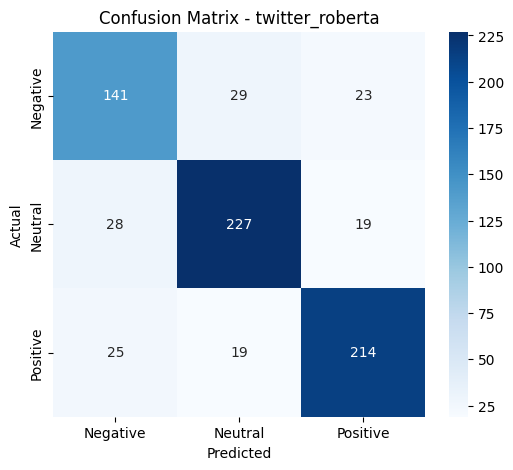

              precision    recall  f1-score   support

    Negative       0.73      0.73      0.73       193
     Neutral       0.83      0.83      0.83       274
    Positive       0.84      0.83      0.83       258

    accuracy                           0.80       725
   macro avg       0.80      0.80      0.80       725
weighted avg       0.80      0.80      0.80       725

Evaluating model: distilbert


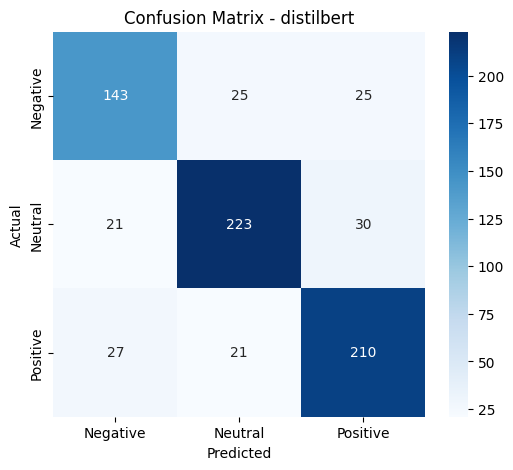

              precision    recall  f1-score   support

    Negative       0.75      0.74      0.74       193
     Neutral       0.83      0.81      0.82       274
    Positive       0.79      0.81      0.80       258

    accuracy                           0.79       725
   macro avg       0.79      0.79      0.79       725
weighted avg       0.79      0.79      0.79       725

Evaluating model: roberta


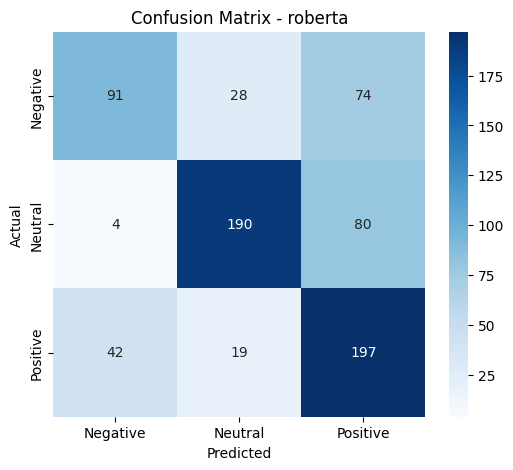

              precision    recall  f1-score   support

    Negative       0.66      0.47      0.55       193
     Neutral       0.80      0.69      0.74       274
    Positive       0.56      0.76      0.65       258

    accuracy                           0.66       725
   macro avg       0.68      0.64      0.65       725
weighted avg       0.68      0.66      0.66       725



In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from sklearn.metrics import confusion_matrix, classification_report

# Function to create confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate each trained model
for model_name, save_name in model_names.items():
    print(f"Evaluating model: {save_name}")

    # Load the trained model
    model = trained_models[save_name]
    model.eval()

    # Load the tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Tokenize the test data
    test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors="pt")

    # Move tensors to the appropriate device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move the model to the device
    inputs = {key: val.to(device) for key, val in test_encodings.items()} # Move inputs to the device

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predictions
    predictions = torch.argmax(outputs.logits, dim=1).cpu().numpy()

    # Compute and display confusion matrix
    plot_confusion_matrix(y_test.values, predictions, save_name)

    # Print classification report
    print(classification_report(y_test.values, predictions, target_names=["Negative", "Neutral", "Positive"]))

# Find the best model
### The best model is **"twitter_roberta"**
### -> Then bring it to predict the 90% of non labelling (manual) data left.

In [ ]:
import pandas as pd

df = pd.read_excel('Manual_labelling_data.xlsx')

# Convert to datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

print(df)

               created_at                                       cleaned_text  \
0     2020-10-01 01:12:18  caralisette sainsburys concern hard produce se...   
1     2020-10-01 02:06:58  outdoorperscrip emilylinka sainsburys leicnut ...   
2     2020-10-01 02:08:30           lifedrizzle caralisette sainsburys shock   
3     2020-10-01 03:07:34                   blossomblue tmitv sainsburys ask   
4     2020-10-01 03:53:18  mscintheuk huge congratulations last set mscaw...   
...                   ...                                                ...   
24139 2020-12-30 22:58:27  poorscousertom ocado sainsburys pay monthly am...   
24140 2020-12-30 23:05:39  arengoing sainsburys insist talk phone importa...   
24141 2020-12-30 23:08:54  ocado poorscousertom sainsburys thank ocado th...   
24142 2020-12-30 23:52:49  lidlgb aldiuk ocado sainsburys marksandspencer...   
24143 2020-12-30 23:53:21  poorscousertom docrussjackson ocado sainsburys...   

      sentiment  
0      Negative  
1  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Extract text data and sentiment labels
X = df[['created_at','cleaned_text']]
y = df['sentiment']

# Handle missing values (NaN) by replacing them with 'UNKNOWN'
X = X.fillna('UNKNOWN')

# Display the last few rows for verification
display(X.tail())

# Print dataset size before train-test split
print(f"Total rows in original dataset: {len(df)}")
print(f"Total rows in selected dataset: {len(df)}")

# Manually Split Data (First 3,237 rows are labeled, Remaining 90% for prediction)
X_train = df.iloc[:2414]  # First 10% (Already labeled)
X_test = df.iloc[2414:]   # Remaining 90% (Needs sentiment prediction)

# Ensure X_test is a DataFrame with 'cleaned_text' and 'created_at'
X_test = X_test.reset_index(drop=True)

# Print final dataset distribution after train-test split
print(f"Total rows in X_train: {len(X_train)}")
print(f"Total rows in X_test: {len(X_test)}")

,created_at,cleaned_text
24139,2020-12-30 22:58:27,poorscousertom ocado sainsburys pay monthly am...
24140,2020-12-30 23:05:39,arengoing sainsburys insist talk phone importa...
24141,2020-12-30 23:08:54,ocado poorscousertom sainsburys thank ocado th...
24142,2020-12-30 23:52:49,lidlgb aldiuk ocado sainsburys marksandspencer...
24143,2020-12-30 23:53:21,poorscousertom docrussjackson ocado sainsburys...


Total rows in original dataset: 24144
Total rows in selected dataset: 24144
Total rows in X_train: 2414
Total rows in X_test: 21730


In [ ]:
from transformers import pipeline
from tqdm.auto import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the pre-trained sentiment analysis model
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Ensure X_test is a DataFrame with 'cleaned_text' and 'created_at'
X_test = X_test.reset_index(drop=True)

# Ensure X_test['cleaned_text'] is valid (remove NaN and empty strings)
X_test = X_test.dropna(subset=['cleaned_text'])  # Drop missing text values
X_test = X_test[X_test['cleaned_text'].str.strip() != ""]  # Remove empty text

# Filter out empty strings
X_test_filtered = X_test[X_test['cleaned_text'].str.strip() != ""]

# Print sample texts
print(f"Sample texts: {X_test_filtered['cleaned_text'].tolist()[:5]}")

# Initialize variables for storing results
y_pred = []
sentiment_counts = {"positive": 0, "neutral": 0, "negative": 0}
sentiment_texts = {"positive": "", "neutral": "", "negative": ""}  # For word clouds

# Predict sentiment on X_test (90% unlabeled data)
print("\n Predicting Sentiments for Unlabeled Data...")
for text in tqdm(X_test_filtered['cleaned_text'].tolist()):
    result = classifier(text)[0]  # Get prediction
    label = result['label']  # Extract sentiment label

    # Store predictions
    y_pred.append(label)
    sentiment_counts[label] += 1
    sentiment_texts[label] += text + " "  # Store text for visualization

# Store results in a DataFrame
df_results = X_test_filtered.copy()
df_results['predicted_label'] = y_pred  # Add sentiment prediction

# Save predictions to Excel
df_results.to_excel("predicted_sentiments.xlsx", index=False)
print("Predictions saved to 'predicted_sentiments.xlsx'")

# Print final sentiment counts
print("\nFinal Sentiment Distribution:")
print(sentiment_counts)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


Sample texts: ['directors americans would vote biden conservatives panic easily queennat_ sainsburys also create safe space white asians latinos black staff matter', 'janaltendorff long racists uk reply demonstrate many tweet never die bravo', 'the_ouroboros__ rubenlopest sainsburys oh heaven sake troll point mute', 'vbermoothes sainsburys already do look bgt really stupid', 'fluffmitten nclarke sainsburys shop sainsburys racists leave']

 Predicting Sentiments for Unlabeled Data...


  0%|          | 0/21730 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Predictions saved to 'predicted_sentiments.xlsx'

Final Sentiment Distribution:
{'positive': 3325, 'neutral': 10317, 'negative': 8088}


Sentiment Counts and Percentages:
Positive: 3325 (15.30%)
Neutral: 10317 (47.48%)
Negative: 8088 (37.22%)


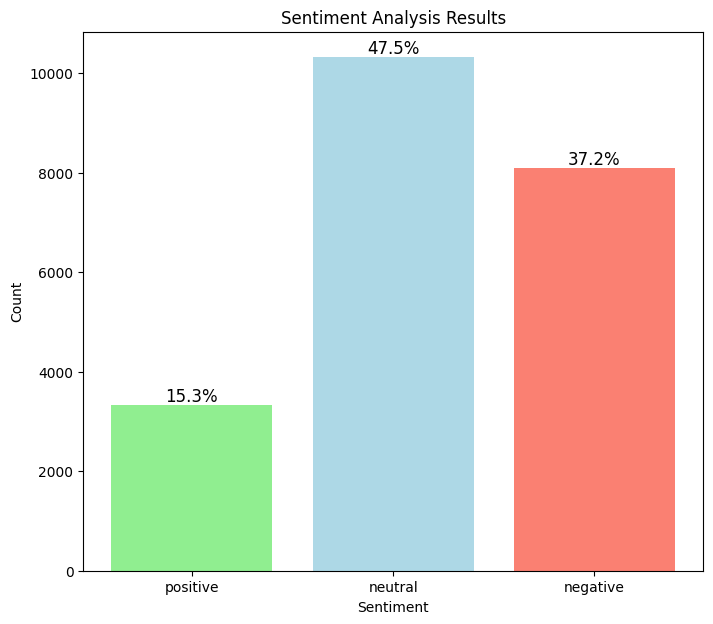

In [ ]:
# Calculate total number of classified texts
total_sentiments = sum(sentiment_counts.values())

# Convert counts to percentages
sentiment_percentages = {k: (v / total_sentiments) * 100 for k, v in sentiment_counts.items()}

# Print sentiment counts and percentages
print("Sentiment Counts and Percentages:")
for sentiment, count in sentiment_counts.items():
    percentage = sentiment_percentages[sentiment]
    print(f"{sentiment.capitalize()}: {count} ({percentage:.2f}%)")

# Create bar chart
plt.figure(figsize=(8, 7))
bars = plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['lightgreen', 'lightblue', 'salmon'])

# Add percentage labels on top of bars
for bar, sentiment in zip(bars, sentiment_counts.keys()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{sentiment_percentages[sentiment]:.1f}%",
             ha='center', va='bottom', fontsize=12)

plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Results")
plt.show()

# **Label and Predict**

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('Label and Predict.xlsx')

# Convert to datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Display the selected rows
print(df)

               created_at                                       cleaned_text  \
0     2020-10-01 01:12:18  caralisette sainsburys concern hard produce se...   
1     2020-10-01 02:06:58  outdoorperscrip emilylinka sainsburys leicnut ...   
2     2020-10-01 02:08:30           lifedrizzle caralisette sainsburys shock   
3     2020-10-01 03:07:34                   blossomblue tmitv sainsburys ask   
4     2020-10-01 03:53:18  mscintheuk huge congratulations last set mscaw...   
...                   ...                                                ...   
24139 2020-12-30 22:58:27  poorscousertom ocado sainsburys pay monthly am...   
24140 2020-12-30 23:05:39  arengoing sainsburys insist talk phone importa...   
24141 2020-12-30 23:08:54  ocado poorscousertom sainsburys thank ocado th...   
24142 2020-12-30 23:52:49  lidlgb aldiuk ocado sainsburys marksandspencer...   
24143 2020-12-30 23:53:21  poorscousertom docrussjackson ocado sainsburys...   

      sentiment  
0      negative  
1  


Sentiment Counts and Percentages:
Positive: 4185 (17.33%)
Neutral: 11230 (46.51%)
Negative: 8729 (36.15%)


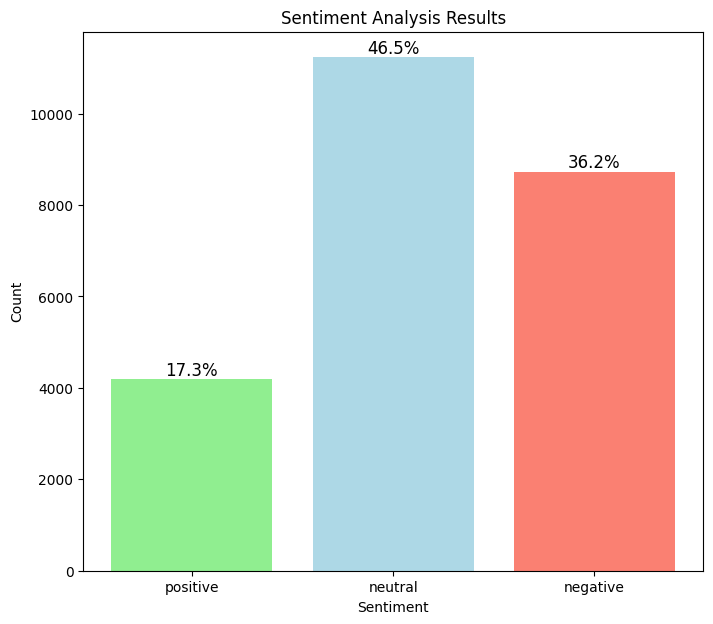

In [ ]:
from transformers import pipeline
from tqdm.auto import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Count occurrences of each sentiment category
sentiment_counts = df["sentiment"].value_counts()

# Define order and colors
sentiment_order = ["positive", "neutral", "negative"]
colors = ["lightgreen", "lightblue", "salmon"]

# Reorder counts to match desired order
sentiment_counts = sentiment_counts.reindex(sentiment_order, fill_value=0)

# Calculate percentages
total_sentiments = sentiment_counts.sum()
sentiment_percentages = (sentiment_counts / total_sentiments) * 100

# Print sentiment counts and percentages
print("\nSentiment Counts and Percentages:")
for sentiment, count in sentiment_counts.items():
    percentage = sentiment_percentages[sentiment]
    print(f"{sentiment.capitalize()}: {count} ({percentage:.2f}%)")

# Create a bar chart
plt.figure(figsize=(8, 7))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

# Add percentage labels on top of bars
for bar, sentiment in zip(bars, sentiment_counts.index):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{sentiment_percentages[sentiment]:.1f}%",
             ha='center', va='bottom', fontsize=12, color='black')

# Labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Results")

# Show the plot
plt.show()

Top 10 Positive Words: [('thank', 767), ('love', 428), ('great', 389), ('christmas', 367), ('good', 345), ('get', 255), ('would', 248), ('advert', 248), ('well', 225), ('see', 191)]
Top 10 Negative Words: [('people', 1602), ('racist', 1072), ('get', 925), ('lozzafox', 873), ('go', 803), ('black', 767), ('white', 741), ('like', 715), ('say', 695), ('think', 619)]
Top 10 Neutral Words: [('get', 820), ('lozzafox', 806), ('people', 766), ('aldiuk', 675), ('go', 672), ('would', 546), ('one', 502), ('say', 501), ('lidlgb', 480), ('think', 477)]


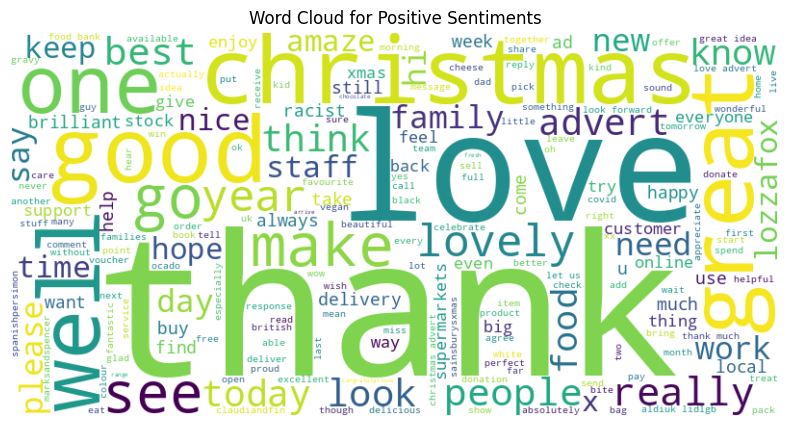

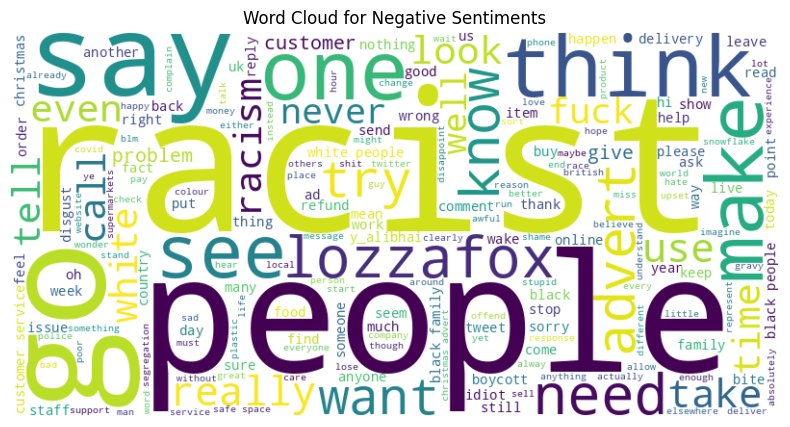

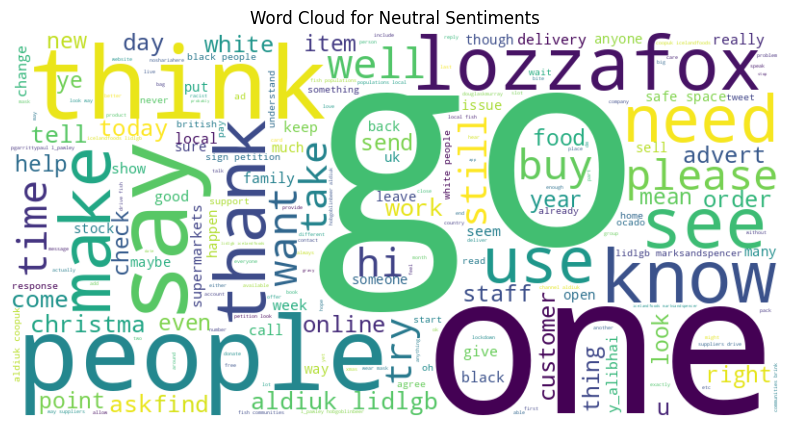

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Function to remove stopwords
def remove_stopwords(text, stopwords):
    words = text.lower().split()
    return " ".join([word for word in words if word not in stopwords])

# Check if sentiment predictions exist
if 'y_pred' in locals() and y_pred is not None and len(y_pred) > 0:
    df_analysis = pd.DataFrame({'cleaned_text': X_test['cleaned_text'], 'predicted_sentiment': y_pred})

    # Remove brand names before word analysis
    df_analysis['cleaned_text_no_brand'] = df_analysis['cleaned_text'].apply(lambda x: remove_stopwords(x, custom_stopwords))

    # Separate texts by sentiment (check for string values)
    positive_texts = ' '.join(df_analysis[df_analysis['predicted_sentiment'] == 'positive']['cleaned_text_no_brand'])
    negative_texts = ' '.join(df_analysis[df_analysis['predicted_sentiment'] == 'negative']['cleaned_text_no_brand'])
    neutral_texts = ' '.join(df_analysis[df_analysis['predicted_sentiment'] == 'neutral']['cleaned_text_no_brand'])

    # Function to get top 20 words
    def get_top_words(text, num_words=10):
        words = text.split()
        word_counts = Counter(words)
        return word_counts.most_common(num_words)

    # Get top 20 words for each sentiment
    top_positive_words = get_top_words(positive_texts, 10)
    top_negative_words = get_top_words(negative_texts, 10)
    top_neutral_words = get_top_words(neutral_texts, 10)

    # Print top words
    print("Top 10 Positive Words:", top_positive_words)
    print("Top 10 Negative Words:", top_negative_words)
    print("Top 10 Neutral Words:", top_neutral_words)

    # Generate word clouds
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
    wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)

    # Display word clouds
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Positive Sentiments")
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Negative Sentiments")
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Neutral Sentiments")
    plt.show()